In [2]:
# !pip install tslearn

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
# from dtaidistance import dtw
# from dtaidistance import dtw_visualisation as dtwvis

#### Calculate Pearson correlations between the time series.

##### Correlations between the price series in the pre-period.

In [13]:
price = pd.read_csv('../data/median_comp_price.csv')
# price
price = price.drop('date.1', axis =1)
price = price.drop('date', axis =1)

# df.iloc[:132]

In [14]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 2 columns):
Portland_median_price    216 non-null float64
SF_median_price          213 non-null float64
dtypes: float64(2)
memory usage: 3.5 KB


In [15]:
# df.iloc[:141]

In [16]:
def pearson_corr(df,idx,dt,var):

    pre_df = df.iloc[:idx]
    overall_pearson_r = pre_df.corr().iloc[0,1]
    print(f"Pandas computed Pearson r up to {dt}: {overall_pearson_r}")


    r, p = stats.pearsonr(pre_df.dropna()[f"Portland_{var}"], pre_df.dropna()[f"SF_{var}"])
    print(f"Scipy computed Pearson r: {r} and p-value: {p}")


    # Compute rolling window synchrony
    f,ax=plt.subplots(figsize=(12,4))
    pre_df.rolling(window=4,center=True).mean().plot(ax=ax)
    ax.set(xlabel='Time',ylabel='Price')
    ax.set(title=f"Pearson Correlation between the Price Series Up to {dt} r = {np.round(overall_pearson_r,2)}");

Pandas computed Pearson r up to 2017-10-29: 0.8263317722942677
Scipy computed Pearson r: 0.8263317722942666 and p-value: 1.0380428145700521e-32


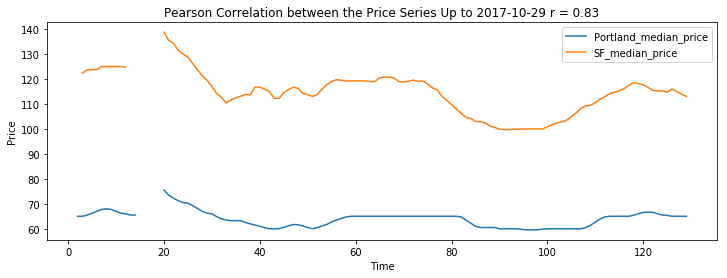

In [17]:
pearson_corr(price,131,'2017-10-29','median_price')

Pandas computed Pearson r up to 2018-01-14: 0.7896848432793043
Scipy computed Pearson r: 0.7896848432793031 and p-value: 3.21051415846313e-30


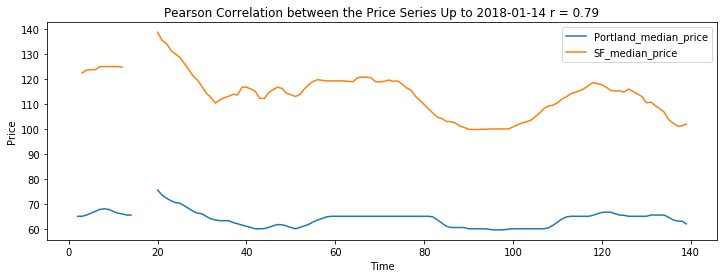

In [18]:
pearson_corr(price,141,'2018-01-14','median_price')

In [ ]:
# def crosscorr(datax, datay, lag=0, wrap=False):
#     """ Lag-N cross correlation. 
#     Shifted data filled with NaNs 
    
#     Parameters
#     ----------
#     lag : int, default 0
#     datax, datay : pandas.Series objects of equal length
#     Returns
#     ----------
#     crosscorr : float
#     """
    
    
    
#     if wrap:
#         shiftedy = datay.shift(lag)
#         shiftedy.iloc[:lag] = datay.iloc[-lag:].values
#         return datax.corr(shiftedy)
#     else: 
#         return datax.corr(datay.shift(lag))

# pre_price = price[:131]
# d1 = pre_price['Portland_avg_price']
# d2 = pre_price['SF_avg_price']



# rs = [crosscorr(d1,d2, lag) for lag in range(52)]
# offset = np.ceil(len(rs)/2)-np.argmax(rs)
# f,ax=plt.subplots(figsize=(14,3))
# ax.plot(rs)
# ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
# ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
# ax.set(title=f'Offset = {offset} weeks\n Portland leads <> SF leads',ylim=[-.1,1],xlim=[-200,500], xlabel='Offset',ylabel='Pearson r')
# ax.set_xticklabels([int(item-150) for item in ax.get_xticks()])
# plt.legend()

In [19]:
# https://dtaidistance.readthedocs.io/en/latest/usage/dtw.html

# s1 = np.asarray(pre_df['SF_avg_price'])

# s2 = np.asarray(pre_df['Portland_avg_price'])

# d = dtw.distance_fast(s1, s2)

# https://dtaidistance.readthedocs.io/en/latest/usage/dtw.html
from scipy.spatial.distance import euclidean

# from fastdtw import fastdtw

from tslearn.metrics import dtw

comp = pre_price.fillna(method = 'ffill').iloc[1:]

s1 = np.asarray(comp['SF_median_price'])

s2 = np.asarray(comp['Portland_median_price'])

dtw(s1,s2)

ModuleNotFoundError: No module named 'tslearn'

##### Correlations between the supply series in the pre-period.

In [ ]:
supply = pd.read_csv('../data/comp_supply_avail.csv')
supply = supply.drop('file_scraped_dt.1', axis =1)

supply_t = supply.set_index(pd.DatetimeIndex(supply['file_scraped_dt']))
pre_supply = supply_t[:'2017-11-13'].resample('M').max()
pre_supply = pre_supply.drop('file_scraped_dt',axis=1).reset_index().drop('file_scraped_dt',axis=1)
# pre_supply
# pearson_corr(131,'2017-10-29',"counts")

In [ ]:
dt = "2017-11-30"
var = "counts"

# pre_df = pre_df.drop('file_scraped_dt', axis =1)
overall_pearson_r = pre_supply.corr().iloc[0,1]
print(f"Pandas computed Pearson r up to {dt}: {overall_pearson_r}")


r, p = stats.pearsonr(pre_supply.dropna()[f"Portland_{var}"], pre_supply.dropna()[f"SF_{var}"])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(12,4))
pre_supply.rolling(window=3,center=True).mean().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Supply')
ax.set(title=f"Pearson Correlation in the Supply Series Up to {dt} r = {np.round(overall_pearson_r,2)}");

##### Correlations between the demand series in the pre- and post- periods.

In [ ]:
# Include both pre- and post-periods for the demand.

var = 'counts'

demand = pd.read_csv('../data/comp_weekly_demand.csv')
demand = demand.drop('date', axis =1)
demand = demand.iloc[:,1:3]
demand

overall_pearson_r = demand.corr().iloc[0,1]
print(f"Pandas computed Pearson r up to {dt}: {overall_pearson_r}")


r, p = stats.pearsonr(demand.dropna()[f"Portland_{var}"], demand.dropna()[f"SF_{var}"])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(12,4))
demand.rolling(window=4,center=True).mean().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Demand')
ax.set(title=f"Pearson Correlation between the Demand Series up to {dt} r = {np.round(overall_pearson_r,2)}");

##### Correlations between the price series in the post-period.

In [ ]:

var = "median_price"

post_price = price.iloc[131:]
overall_pearson_r = post_price.corr().iloc[0,1]
print(f"Pandas computed Pearson r up to {dt}: {overall_pearson_r}")


r, p = stats.pearsonr(post_price.dropna()[f"Portland_{var}"], post_price.dropna()[f"SF_{var}"])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(12,4))
post_price.rolling(window=4,center=True).mean().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Pearson Correlation between the Price Series in the post-period r = {np.round(overall_pearson_r,2)}");